In [ ]:
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch.nn as nn


In [ ]:
model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")

inputs=tokenizer(df['SMILES'].tolist(),return_tensors="pt",padding=True,truncation=True)

# disable the lm_head so that we only get the transformer output
model.lm_head =nn.Identity()
out = model(**inputs)[0]

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
out.shape

torch.Size([23, 36, 384])

In [ ]:
def get_chemberta(df,smi_col,combine=True):

  model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
  tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")

  inputs=tokenizer(df[smi_col].tolist(),return_tensors="pt",padding=True,truncation=True)

  # disable the lm_head so that we only get the transformer output
  model.lm_head =nn.Identity()
  out = model(**inputs)[0] # get the logits of the input

  # Get the mean of embeddings
  mean = out.mean(1).detach().numpy()

  # CLS token embedding, from the first token of the seq
  cls = out[:,0,:].detach().numpy()

  if combine:
    emb = np.concatenate([mean,cls],axis=-1)
    emb_df = pd.DataFrame(emb)
    emb_df.columns = 'chemberta_'+emb_df.columns.astype(str)
    emb_df.index=df.index
    return emb_df

  else:
    cls_df = pd.DataFrame(cls)
    mean_df = pd.DataFrame(mean)

    cls_df.columns = 'chemberta_'+cls_df.columns.astype(str)
    mean_df.columns = 'chemberta_'+mean_df.columns.astype(str)

    cls_df.index, mean_df =df.index,df.index

    return cls_df, mean_df


In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -Uqq

In [ ]:
from katlas.core import *
from katlas.plot import *

In [ ]:
df = Data.get_aa_info().iloc[:-2,:].reset_index()

In [ ]:
feat = get_chemberta(df,'SMILES')

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
from katlas.feature import *

In [ ]:
preprocess(feat)

removing columns: {'chemberta_556', 'chemberta_696', 'chemberta_682', 'chemberta_311', 'chemberta_479', 'chemberta_500', 'chemberta_544'}


chemberta_0  chemberta_1  chemberta_2  chemberta_3  chemberta_4  \
0     -0.247786     0.266526     0.022662     0.059979    -0.184756   
1     -0.275487     0.247620     0.026930     0.107188    -0.067540   
2     -0.405613     0.201610     0.020172     0.116088    -0.033048   
3     -0.426248     0.129194     0.002575     0.058240    -0.033585   
4     -0.203164     0.193679    -0.017718     0.026469    -0.124946   
5     -0.240030     0.377806     0.078936     0.207638    -0.265623   
6     -0.071614     0.092126    -0.048827     0.047353    -0.086741   
7     -0.211849     0.089471    -0.019884    -0.100337    -0.085544   
8     -0.244878     0.125673    -0.034066    -0.155094    -0.167125   
9     -0.229441     0.101383    -0.012762    -0.090533    -0.119316   
10    -0.264361     0.079948    -0.013999    -0.073740    -0.198111   
11    -0.181322     0.172843    -0.016215    -0.075396    -0.084483   
12    -0.257013     0.132372    -0.011658     0.171975    -0.122687   
13    -0.180907     0.122149    -0.031198    -0.066254    -0.180548   
14    -0.247614     0.043137    -0.029947     0.023455    -0.024367   
15    -0.272638     0.260739     0.020151     0.059453    -0.143167   
16    -0.253234     0.205984    -0.009463    -0.011988    -0.058880   
17    -0.238055     0.170042    -0.007656    -0.065263    -0.066039   
18    -0.144531    -0.104556    -0.005457     0.127336    -0.158398   
19    -0.212569    -0.259687    -0.075548    -0.093789    -0.100710   
20    -0.586040     0.196601     0.120715    -0.331170     0.016576   
21    -0.416975     0.091202     0.053443    -0.472970    -0.092289   
22    -0.488412     0.243890     0.006786    -0.496382    -0.171608   

    chemberta_5  chemberta_6  chemberta_7  chemberta_8  chemberta_9  \
0     -0.052462     0.331725     0.115973     0.410294     0.239444   
1      0.138994     0.228389     0.115909     0.705716     0.296300   
2     -0.063296     0.435023     0.364472     0.741338     0.888924   
3     -0.021332     0.261912     0.387150     0.858772     0.870793   
4     -0.105704    -0.177405     0.479621     1.058834     0.740709   
5      0.069683     0.530928     0.175390     0.300118     0.102200   
6     -0.098199    -0.154742     0.205820     0.457078     0.461929   
7      0.003488    -0.046826     0.250585     0.773806     0.562333   
8      0.084478    -0.048825     0.332431     0.909981     0.702448   
9      0.013931    -0.010504     0.281785     0.755336     0.545327   
10     0.182609    -0.041515     0.477470     1.105017     0.887626   
11    -0.236962     0.208640     0.182871     0.713367     0.656026   
12     0.128099     0.065400     0.296513     0.756453     0.595940   
13    -0.150635     0.098852     0.270900     0.827201     0.792591   
14     0.186757    -0.077774     0.435626     1.007143     0.904489   
15     0.001208     0.347716     0.200169     0.483024     0.342199   
16    -0.040367     0.188084     0.282410     0.607200     0.519033   
17    -0.063532     0.093754     0.179806     0.611099     0.415666   
18    -0.053563    -0.298716     0.632207     1.349421     1.271279   
19     0.016496    -0.459882     0.596981     0.952175     0.750207   
20     0.104704     0.209979     0.100441     0.441009     0.183208   
21     0.105697    -0.248193     0.160584     0.587958     0.541023   
22    -0.099023    -0.472240     0.407224     0.744972     0.492205   

    chemberta_10  chemberta_11  chemberta_12  chemberta_13  chemberta_14  \
0      -0.248496     -0.229207     -0.104345      0.243163     -0.083476   
1      -0.398120     -0.338695     -0.179082      0.376901     -0.016521   
2      -0.251683     -0.503249     -0.288511      0.469925     -0.237930   
3      -0.220279     -0.510935     -0.097556      0.548989     -0.037903   
4      -0.414577     -0.576129      0.059673      0.737411      0.168418   
5      -0.339254     -0.211010     -0.017149      0.144201     -0.390169   
6      -0.436804     -0.271538      0.232198      0.490198    

In [ ]:
df

,aa,Name,SMILES,MW,pKa1,pKb2,pKx3,pl4,H,VSC,P1,P2,SASA,NCISC,phospho
0,A,Alanine,C[C@@H](C(=O)O)N,89.10,2.34,9.69,NaN,6.00,0.62,27.5,8.1,0.046,1.181,0.007187,0
1,C,Cysteine,C([C@@H](C(=O)O)N)S,121.16,1.96,10.28,8.18,5.07,0.29,44.6,5.5,0.128,1.461,-0.036610,0
2,D,Aspartic acid,C([C@@H](C(=O)O)N)C(=O)O,133.11,1.88,9.60,3.65,2.77,-0.90,40.0,13.0,0.105,1.587,-0.023820,0
3,E,Glutamic acid,C(CC(=O)O)[C@@H](C(=O)O)N,147.13,2.19,9.67,4.25,3.22,-0.74,62.0,12.3,0.151,1.862,0.006802,0
4,F,Phenylalanine,c1ccc(cc1)C[C@@H](C(=O)O)N,165.19,1.83,9.13,NaN,5.48,1.19,115.5,5.2,0.290,2.228,0.037552,0
5,G,Glycine,C(C(=O)O)N,75.07,2.34,9.60,NaN,5.97,0.48,0.0,9.0,0.000,0.881,0.179052,0
6,H,Histidine,O=C([C@H](CC1=CNC=N1)N)O,155.16,1.82,9.17,6.00,7.59,-0.40,79.0,10.4,0.230,2.025,-0.010690,0
7,I,Isoleucine,CC[C@H](C)[C@@H](C(=O)O)N,131.18,2.36,9.60,NaN,6.02,1.38,93.5,5.2,0.186,1.810,0.021631,0
8,K,Lysine,C(CCN)C[C@@H](C(=O)O)N,146.19,2.18,8.95,10.53,9.74,-1.50,100.0,11.3,0.219,2.258,0.017708,0
9,L,Leucine,CC(C)C[C@@H](C(=O)O)N,131.18,2.36,9.60,NaN,5.98,1.06,93.5,4.9,0.186,1.931,0.051672,0


In [ ]:
feat.shape[1]/2

384.0

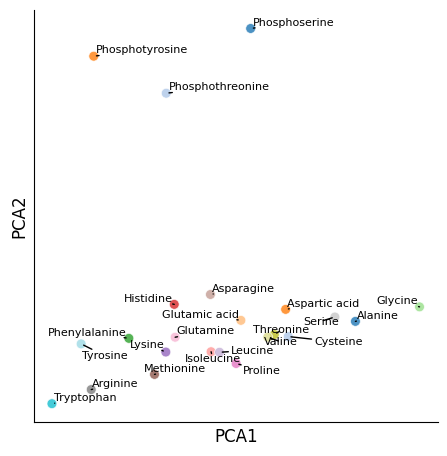

In [ ]:
plot_cluster(feat,'pca',hue=df.Name,name_list =df.Name)

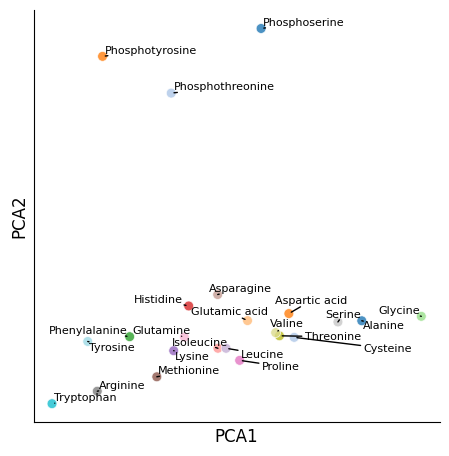

In [ ]:
plot_cluster(feat.iloc[:,:384],'pca',hue=df.Name,name_list =df.Name)

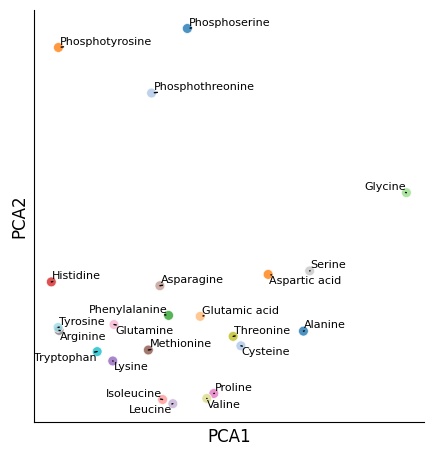

In [ ]:
plot_cluster(feat.iloc[:,384:],'pca',hue=df.Name,name_list =df.Name)

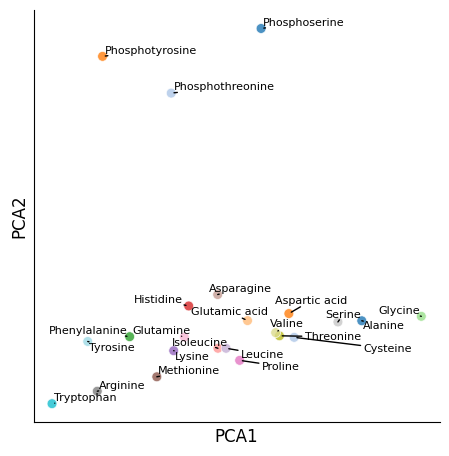

In [ ]:
plot_cluster(feat.iloc[:,:384],'pca',hue=df.Name,name_list =df.Name )

In [ ]:
df = pd.DataFrame(["C#CC1=C(C=CC2=CC(=CC(=C21)C3=NC=C4C(=C3F)N=C(N=C4N5CC6CCC(C5)N6)OCC78CCCN7CC(C8)F)O)F","C#CC1=C(C=CC2=CC(=CC(=C21)C3=NC=C4C(=C3F)N=C(N=C4N5CC6CCC(C5)N6)OCC78CCCN7CC(C8)F)O)F"],columns=['smile'])

In [ ]:
a,b = get_chemberta(df,'smile')

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
ab = np.concatenate([a,b],axis=-1)

In [ ]:
ab = pd.DataFrame(ab)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=768)

Index(['chemberta_0', 'chemberta_1', 'chemberta_2', 'chemberta_3',
       'chemberta_4', 'chemberta_5', 'chemberta_6', 'chemberta_7',
       'chemberta_8', 'chemberta_9',
       ...
       'chemberta_758', 'chemberta_759', 'chemberta_760', 'chemberta_761',
       'chemberta_762', 'chemberta_763', 'chemberta_764', 'chemberta_765',
       'chemberta_766', 'chemberta_767'],
      dtype='object', length=768)

In [ ]:
a.shape

(2, 384)

In [ ]:
b.shape

(2, 384)

In [ ]:
model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
model.lm_head =nn.Identity() # disable the lm_head so that we only get the transformer output

inputs=tokenizer(df[smi_col],return_tensors="pt",padding=True,truncation=True)
out = model(**inputs)
out.mean(1)
out[:,0,:] # CLS token embedding, the first one

In [ ]:
model = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
smi = "C#CC1=C(C=CC2=CC(=CC(=C21)C3=NC=C4C(=C3F)N=C(N=C4N5CC6CCC(C5)N6)OCC78CCCN7CC(C8)F)O)F"

In [ ]:
smiles = [smi,smi]

In [ ]:
input=tokenizer(smiles,return_tensors="pt",padding=True,truncation=True)

In [ ]:
out = model(**input)

In [ ]:
out.logits

tensor([[[ 0.1026, -0.0263, -0.1524,  ...,  0.0383, -0.4000, -0.0561],
         [-0.3946,  0.3700, -0.1482,  ...,  0.4531, -0.5454, -1.6740],
         [-0.3919,  0.3542, -0.1502,  ...,  0.4512, -0.5723, -1.6832],
         ...,
         [-0.0850,  0.1760, -0.1477,  ...,  0.3361,  0.2371, -0.9950],
         [-0.4071,  0.3582, -0.1299,  ...,  0.3296,  0.1734, -1.4095],
         [-0.3577, -0.1101, -0.1261,  ...,  0.2992,  0.0855, -1.2560]],

        [[ 0.1026, -0.0263, -0.1524,  ...,  0.0383, -0.4000, -0.0561],
         [-0.3946,  0.3700, -0.1482,  ...,  0.4531, -0.5454, -1.6740],
         [-0.3919,  0.3542, -0.1502,  ...,  0.4512, -0.5723, -1.6832],
         ...,
         [-0.0850,  0.1760, -0.1477,  ...,  0.3361,  0.2371, -0.9950],
         [-0.4071,  0.3582, -0.1299,  ...,  0.3296,  0.1734, -1.4095],
         [-0.3577, -0.1101, -0.1261,  ...,  0.2992,  0.0855, -1.2560]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
out.logits.shape

torch.Size([2, 87, 384])

In [ ]:
model

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(600, 384, padding_idx=1)
      (position_embeddings): Embedding(515, 384, padding_idx=1)
      (token_type_embeddings): Embedding(1, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.144, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-2): 3 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.109, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): 

In [ ]:
out.logits

tensor([[[ 0.2813,  0.0000,  0.3417,  ...,  0.2167, -0.5179,  0.3271],
         [ 0.3352,  0.0000,  0.0135,  ..., -0.2895, -0.3949,  0.1313],
         [ 0.3452,  0.0000,  0.0051,  ..., -0.2921, -0.3829,  0.1368],
         ...,
         [ 0.3742,  0.0000,  0.2465,  ..., -0.2597, -0.3459,  0.1275],
         [ 0.1534,  0.0000,  0.0089,  ..., -0.3110, -0.3244,  0.1491],
         [ 0.3422,  0.0000,  0.2132,  ..., -0.3661, -0.2871,  0.1667]]],
       grad_fn=<ViewBackward0>)

In [ ]:
out[0]

tensor([[[ 0.2813,  0.0000,  0.3417,  ...,  0.2167, -0.5179,  0.3271],
         [ 0.3352,  0.0000,  0.0135,  ..., -0.2895, -0.3949,  0.1313],
         [ 0.3452,  0.0000,  0.0051,  ..., -0.2921, -0.3829,  0.1368],
         ...,
         [ 0.3742,  0.0000,  0.2465,  ..., -0.2597, -0.3459,  0.1275],
         [ 0.1534,  0.0000,  0.0089,  ..., -0.3110, -0.3244,  0.1491],
         [ 0.3422,  0.0000,  0.2132,  ..., -0.3661, -0.2871,  0.1667]]],
       grad_fn=<ViewBackward0>)

In [ ]:
model._modules['lm_head']

RobertaLMHead(
  (dense): Linear(in_features=384, out_features=384, bias=True)
  (layer_norm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
  (decoder): Linear(in_features=384, out_features=600, bias=True)
)

In [ ]:
out2= model(**input)[0]

In [ ]:
out2.shape

torch.Size([2, 87, 384])

In [ ]:
out2

tensor([[[ 0.1026, -0.0263, -0.1524,  ...,  0.0383, -0.4000, -0.0561],
         [-0.3946,  0.3700, -0.1482,  ...,  0.4531, -0.5454, -1.6740],
         [-0.3919,  0.3542, -0.1502,  ...,  0.4512, -0.5723, -1.6832],
         ...,
         [-0.0850,  0.1760, -0.1477,  ...,  0.3361,  0.2371, -0.9950],
         [-0.4071,  0.3582, -0.1299,  ...,  0.3296,  0.1734, -1.4095],
         [-0.3577, -0.1101, -0.1261,  ...,  0.2992,  0.0855, -1.2560]],

        [[ 0.1026, -0.0263, -0.1524,  ...,  0.0383, -0.4000, -0.0561],
         [-0.3946,  0.3700, -0.1482,  ...,  0.4531, -0.5454, -1.6740],
         [-0.3919,  0.3542, -0.1502,  ...,  0.4512, -0.5723, -1.6832],
         ...,
         [-0.0850,  0.1760, -0.1477,  ...,  0.3361,  0.2371, -0.9950],
         [-0.4071,  0.3582, -0.1299,  ...,  0.3296,  0.1734, -1.4095],
         [-0.3577, -0.1101, -0.1261,  ...,  0.2992,  0.0855, -1.2560]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
out2.mean(1).shape

torch.Size([2, 384])

In [ ]:
out2[:,0,:].shape

torch.Size([2, 384])

In [ ]:
out2.mean(1)[0]

tensor([-1.6335e-01,  1.7669e-01, -1.5773e-01,  5.4381e-01,  1.1386e+00,
        -9.1737e-02, -3.9500e-01,  1.3676e-01,  3.7553e-01,  1.7362e-01,
        -2.4682e-01, -3.0608e-01,  5.0479e-01,  9.2938e-01, -2.3172e-01,
         7.1007e-01, -2.6576e-01,  5.0883e-01, -3.4774e-01, -1.7455e-01,
        -5.8606e-01,  1.3510e-01, -5.0600e-01, -1.1917e-02, -4.2607e-01,
        -3.4766e-02, -4.3321e-01,  2.9059e-01, -1.3262e-01,  2.7920e-02,
        -2.5429e-01, -4.4204e-01, -7.8919e-01, -6.5542e-02,  8.0882e-01,
         4.2388e-01,  2.6252e-01, -1.5452e+00, -8.2381e-01,  3.4690e-01,
        -5.2241e-02,  2.6653e-01, -6.5474e-01, -2.7161e-02, -9.4745e-01,
         6.1169e-01,  1.0688e-01,  9.1898e-01, -5.4209e-01,  1.4557e-01,
        -9.0925e-02, -6.0525e-01,  2.5554e-01,  1.1325e-01, -4.4363e-01,
         1.1499e-01,  1.6758e-01,  5.1536e-02, -4.3921e-02, -1.3028e-01,
        -3.3509e-01,  1.0693e+00, -5.7984e-02, -2.0833e-01,  5.1500e-01,
        -1.0244e+00, -1.1203e-01, -4.3742e-01, -2.3

In [ ]:
len([i for i in smi])

85